In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('Churn_Modelling.csv') 
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn'],
      dtype='object')

In [13]:
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Churn']


In [14]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64


In [26]:
print("\nLast few rows:")
print(df.tail(10))


Last few rows:
      RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
9990       9991    15798964   Nkemakonam          714   Germany    Male   33   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9992       9993    15657105  Chukwualuka          726     Spain    Male   36   
9993       9994    15569266       Rahman          644    France    Male   28   
9994       9995    15719294         Wood          800    France  Female   29   
9995       9996    15606229     Obijiaku          771    France    Male   39   
9996       9997    15569892    Johnstone          516    France    Male   35   
9997       9998    15584532          Liu          709    France  Female   36   
9998       9999    15682355    Sabbatini          772   Germany    Male   42   
9999      10000    15628319       Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9990       3   35016.60           

In [16]:
df_clean = df.dropna()
print(f"\nShape after dropping NaNs: {df_clean.shape}")


Shape after dropping NaNs: (10000, 14)


In [18]:
if df_clean.index[-1] == 1644:
    df_clean = df_clean.iloc[:-1]
    print(f"Shape after removing incomplete last row: {df_clean.shape}")

In [19]:
# Check data types and unique values
print("\nData types:")
print(df_clean.dtypes)
print("\nUnique values in 'Geography':", df_clean['Geography'].unique())
print("Unique values in 'Gender':", df_clean['Gender'].unique())


Data types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

Unique values in 'Geography': ['France' 'Spain' 'Germany']
Unique values in 'Gender': ['Female' 'Male']


In [31]:
# Check missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64


In [21]:
# Check the data structure
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

# Look for churn-related columns
churn_columns = [col for col in df.columns if 'churn' in str(col).lower() or 
                 'attrition' in str(col).lower() or 
                 'exited' in str(col).lower()]
print(f"\nPotential churn columns: {churn_columns}")

if churn_columns:
    for col in churn_columns:
        print(f"\nValue counts for '{col}':")
        print(df[col].value_counts())
        print(f"Churn rate: {df[col].mean():.2%}")

Dataset shape: (10000, 14)

First few rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Churn  
0        101348.88      1  
1        112542.58      0  
2        113931.57      1  
3 

In [33]:
#Identify Numeric & Categorical Columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols


(['RowNumber',
  'CustomerId',
  'CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Churn'],
 ['Surname', 'Geography', 'Gender'])

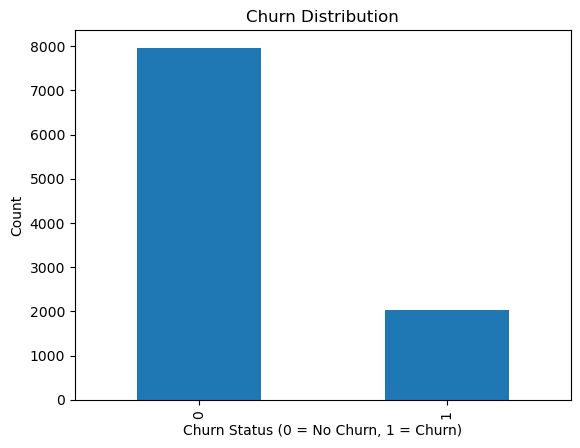

📌 Using churn column: Churn


In [28]:
import matplotlib.pyplot as plt

#Automatically detect churn column (case-insensitive)
churn_col = None
for col in df.columns:
    if "churn" in col.lower() or "exit" in col.lower():
        churn_col = col
        break

#If not found, print columns so we know what exists
if churn_col is None:
    print("❌ No churn/exited column found.")
    print("Available columns:", list(df.columns))
else:
    # ✅ Plot churn distribution
    df[churn_col].value_counts().plot(kind='bar')

    plt.xlabel('Churn Status (0 = No Churn, 1 = Churn)')
    plt.ylabel('Count')
    plt.title('Churn Distribution')
    plt.show()

    print(f"📌 Using churn column: {churn_col}")

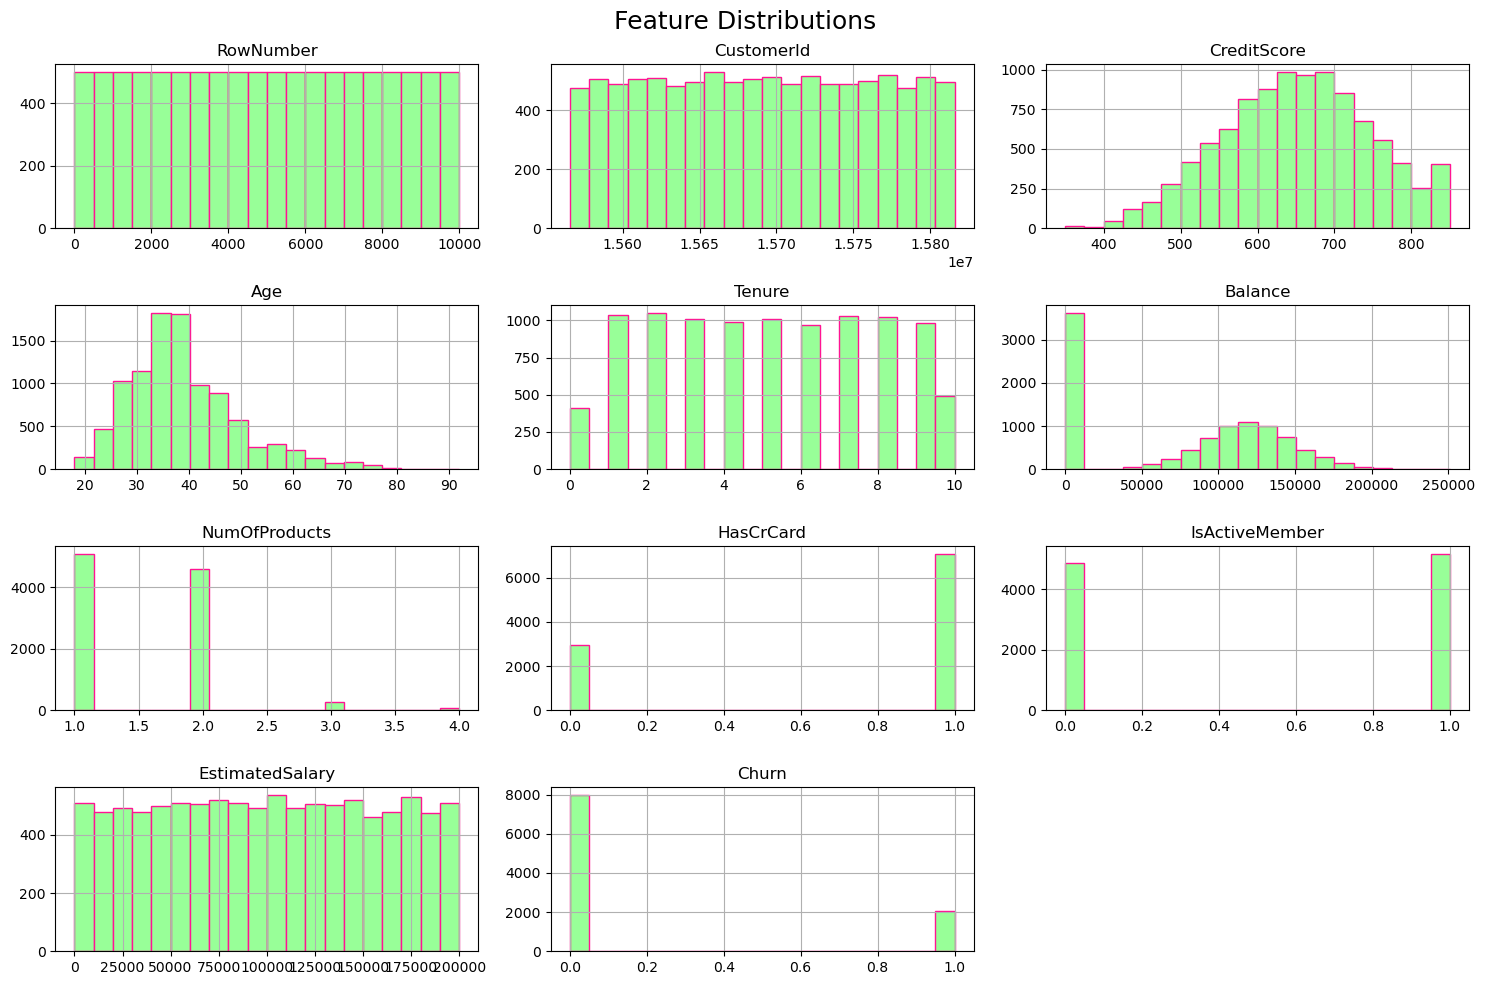

In [30]:
df.hist(figsize=(15, 10), bins=20, color= '#98FF98', edgecolor='#FF1493')
plt.suptitle('Feature Distributions', fontsize=18)
plt.tight_layout()

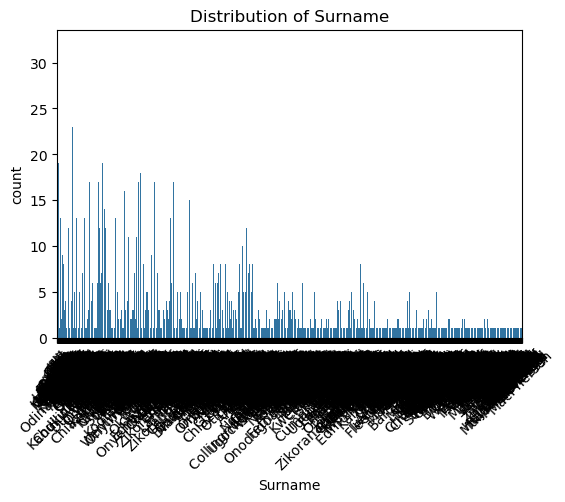

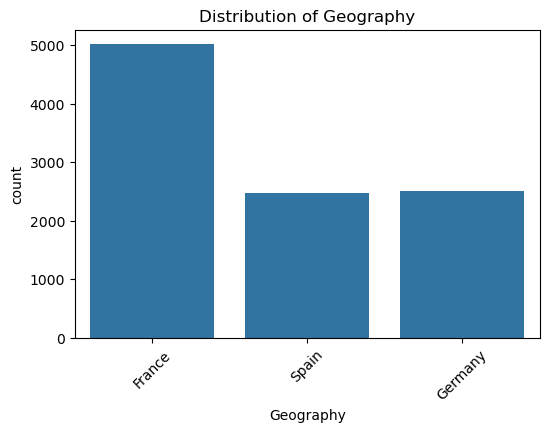

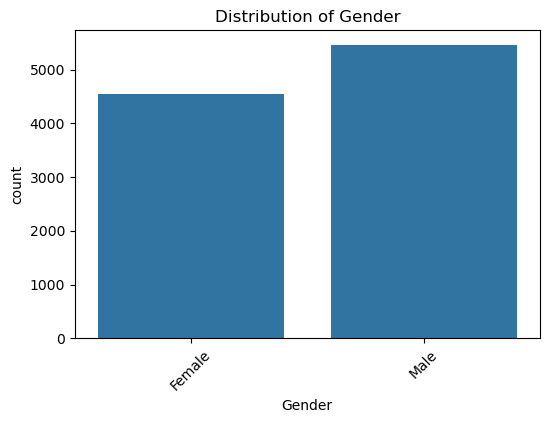

In [38]:
#Categorical Feature Distributions
import seaborn as sns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

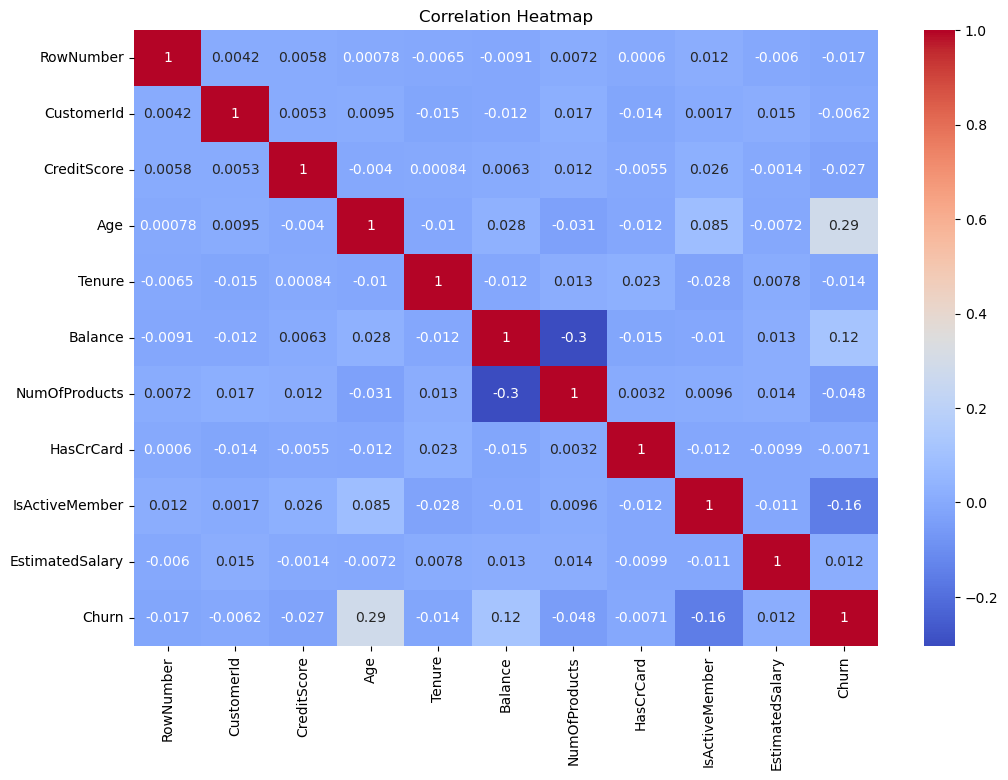

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

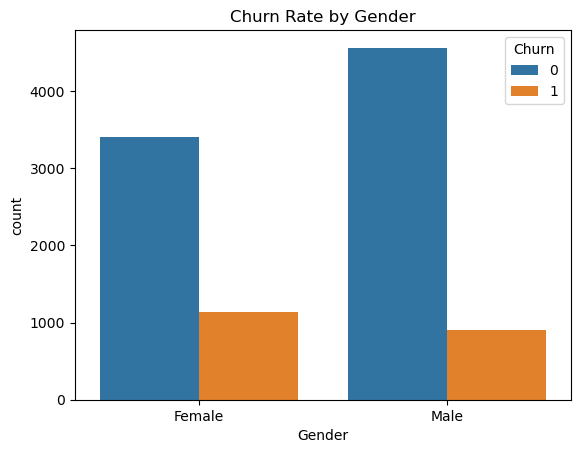

In [40]:
sns.countplot(x='Gender', hue=churn_col, data=df)
plt.title('Churn Rate by Gender')
plt.show()

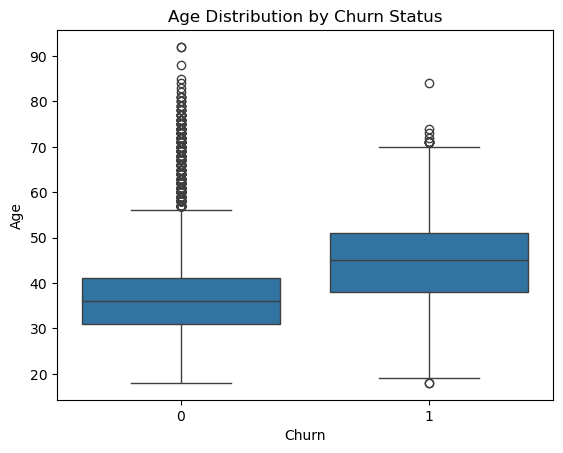

In [41]:
sns.boxplot(x=churn_col, y='Age', data=df)
plt.title('Age Distribution by Churn Status')
plt.show()

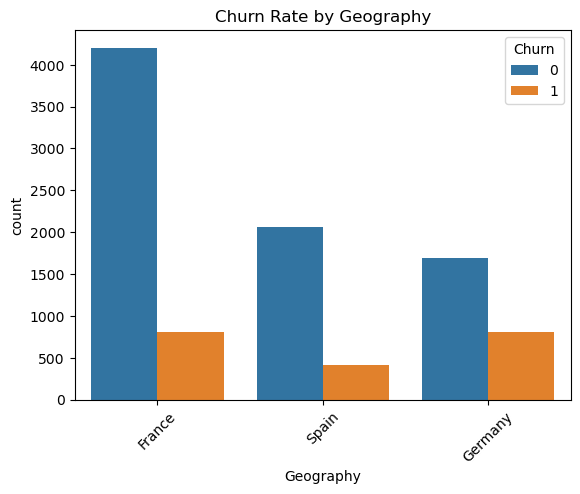

In [46]:
sns.countplot(x='Geography', hue=churn_col, data=df)
plt.title('Churn Rate by Geography')
plt.xticks(rotation=45)
plt.show()


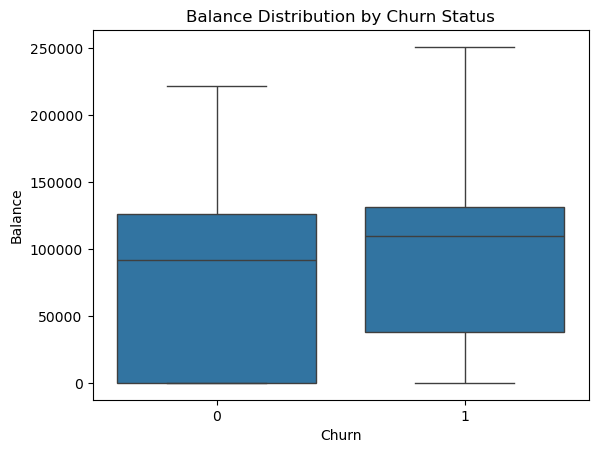

In [47]:
sns.boxplot(x=churn_col, y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.show()

📌 Using churn column: Churn


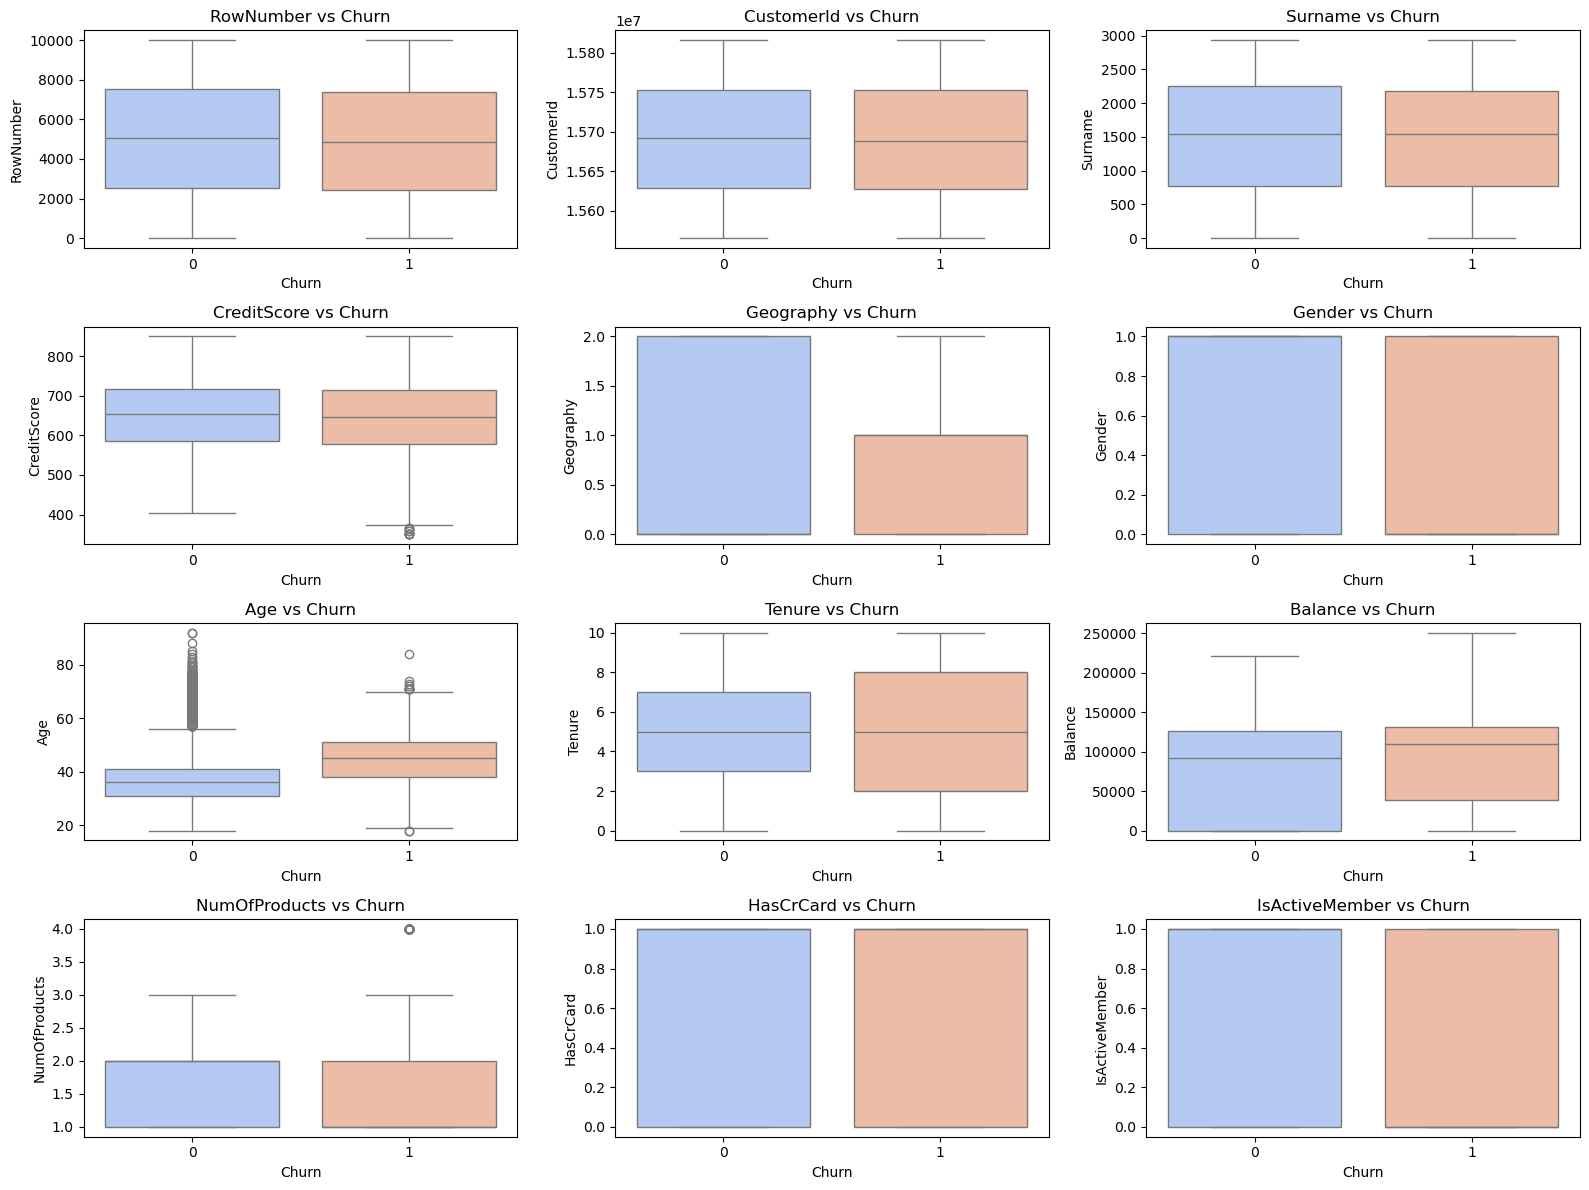

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the churn dataset
df = pd.read_csv("Churn_Modelling.csv")
df.columns = df.columns.str.strip()

# 🔍 Automatically detect the churn/exited column
churn_col = None
for col in df.columns:
    if "churn" in col.lower() or "exit" in col.lower():
        churn_col = col
        break

# Safety check
if churn_col is None:
    raise ValueError("❌ No churn/exited column found in dataset!")

print(f"📌 Using churn column: {churn_col}")

# Encode categorical features
cat_cols = df.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Numeric columns (excluding churn target)
numeric_cols = df.select_dtypes(include="number").columns
columns_to_plot = [col for col in numeric_cols if col != churn_col]

# Limit number of plots (12 max: 4 rows × 3 cols)
rows, cols = 4, 3
max_plots = rows * cols
columns_to_plot = columns_to_plot[:max_plots]

plt.figure(figsize=(16, 12))

for idx, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(
        x=churn_col,
        y=col,
        data=df,
        hue=churn_col,       # Needed to avoid seaborn warning
        palette="coolwarm",
        legend=False
    )
    plt.title(f"{col} vs Churn")
    plt.tight_layout()

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19220\1263318401.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby('Age_Group')[churn_col].agg(['count', 'mean', 'sum']).reset_index()


Churn Statistics by Age Group:
  Age Group  Total Customers  Churn Rate  Churned Customers
0       <20               89    0.056180                  5
1     20-29             1879    0.076104                143
2     30-39             4451    0.120872                538
3     40-49             2320    0.339655                788
4     50-59              797    0.562108                448
5       60+              464    0.247845                115


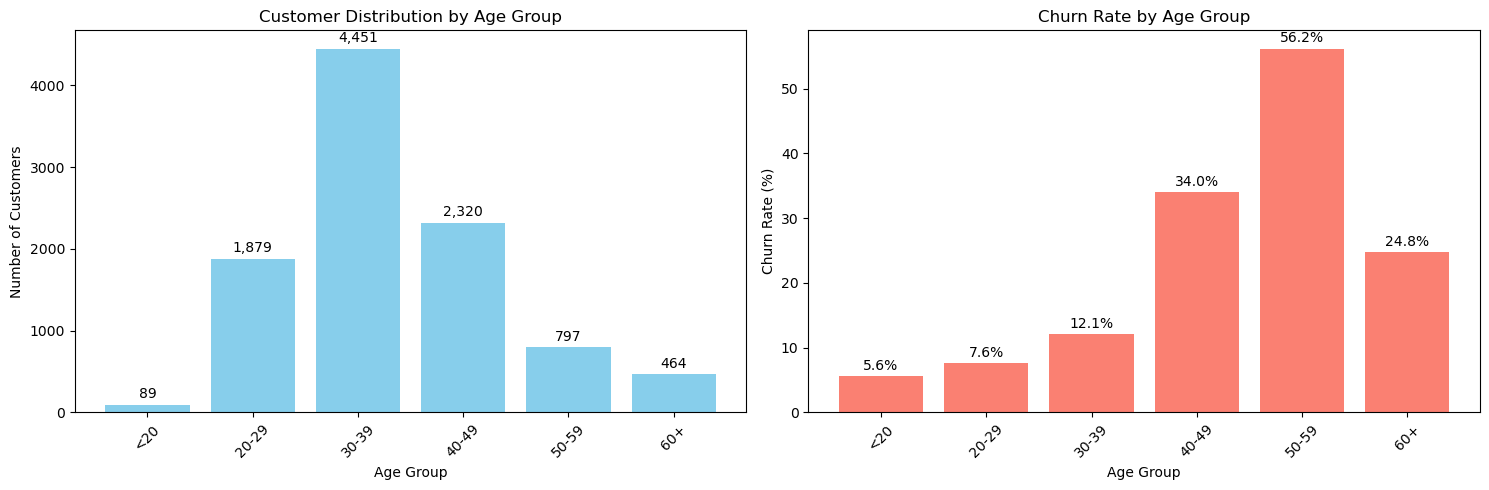

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a binary column for churn if needed
if df['Churn'].dtype == 'object':
    df['Churn_Binary'] = df['Churn'].str.lower().isin(['yes', 'churn', 'true', '1']).astype(int)
    churn_col = 'Churn_Binary'
else:
    churn_col = 'Churn'

# Create age bins for better visualization
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[0, 20, 30, 40, 50, 60, 100],
                         labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+'])

# Calculate churn rate by age group
age_churn = df.groupby('Age_Group')[churn_col].agg(['count', 'mean', 'sum']).reset_index()
age_churn.columns = ['Age Group', 'Total Customers', 'Churn Rate', 'Churned Customers']

print("Churn Statistics by Age Group:")
print(age_churn)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Customer distribution by age
axes[0].bar(age_churn['Age Group'], age_churn['Total Customers'], color='skyblue')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Customer Distribution by Age Group')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels
for i, val in enumerate(age_churn['Total Customers']):
    axes[0].text(i, val + max(age_churn['Total Customers'])*0.01, 
                f'{val:,}', ha='center', va='bottom')

# Plot 2: Churn rate by age
axes[1].bar(age_churn['Age Group'], age_churn['Churn Rate'] * 100, color='salmon')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_title('Churn Rate by Age Group')
axes[1].tick_params(axis='x', rotation=45)

# Add value labels
for i, val in enumerate(age_churn['Churn Rate'] * 100):
    axes[1].text(i, val + 0.5, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [54]:
import numpy as np

# 🔍 Automatically detect the churn column (handles "Exited", "Churn", etc.)
churn_col = None
for col in df.columns:
    if "churn" in col.lower() or "exit" in col.lower():
        churn_col = col
        break

if churn_col is None:
    raise ValueError("❌ No churn-related column found in dataset.")

# ✅ Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# ❌ Remove churn column from numeric list
numeric_cols = [col for col in numeric_cols if col != churn_col]

print("📌 Numeric columns detected:")
print(numeric_cols)

# ⚠️ Replace 0 with NaN ONLY where 0 cannot logically be a valid value
df[numeric_cols] = df[numeric_cols].replace(0, np.nan)

# ✅ Check missing values
df.isnull().sum()


📌 Numeric columns detected:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


RowNumber             0
CustomerId            0
Surname               2
CreditScore           0
Geography          5014
Gender             4543
Age                   0
Tenure              413
Balance            3617
NumOfProducts         0
HasCrCard          2945
IsActiveMember     4849
EstimatedSalary       0
Churn                 0
dtype: int64

In [55]:
df.fillna(df.median(), inplace=True)

In [58]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# -------------------------------
# Detect churn target column automatically
# -------------------------------
churn_col = None
for col in df.columns:
    if "churn" in col.lower() or "exit" in col.lower():
        churn_col = col
        break

if churn_col is None:
    raise ValueError("❌ No churn/exited column detected. Check df.columns")

print("Target column detected:", churn_col)

# -------------------------------
# Separate features and target
# -------------------------------
X = df.drop(churn_col, axis=1)
y = df[churn_col]

# -------------------------------
# Encode all categorical columns
# -------------------------------
cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# -------------------------------
# Scale numerical features
# -------------------------------
scaler = StandardScaler()

# Only scale numeric columns
num_cols = X.select_dtypes(include='number').columns
X[num_cols] = scaler.fit_transform(X[num_cols])

print("Shape of scaled features:", X.shape)
print("Categorical columns encoded:", list(cat_cols))
print("Numeric columns scaled:", list(num_cols))


Target column detected: Churn
Shape of scaled features: (10000, 13)
Categorical columns encoded: []
Numeric columns scaled: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [60]:
# Detect churn column in Churn Modelling dataset
churn_col = None
for col in df.columns:
    if "churn" in col.lower() or "exit" in col.lower():
        churn_col = col
        break

if churn_col is None:
    raise ValueError("❌ No churn column found! Check df.columns")

print("✔ Churn Column Detected:", churn_col)


✔ Churn Column Detected: Churn


In [62]:
X = df.drop(columns=[churn_col])
y = df[churn_col]

from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

print("✔ Encoded categorical columns:", list(cat_cols))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✔ Scaled feature shape:", X_scaled.shape)

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)

# Forward selection of best 6 features
sfs_forward = SequentialFeatureSelector(
    logreg, 
    n_features_to_select=6, 
    direction='forward'
)

sfs_forward.fit(X_scaled, y)

selected_forward = X.columns[sfs_forward.get_support()]

print("✔ Selected Features (Forward Selection):")
print(list(selected_forward))


✔ Encoded categorical columns: []
✔ Scaled feature shape: (10000, 13)
✔ Selected Features (Forward Selection):
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender']


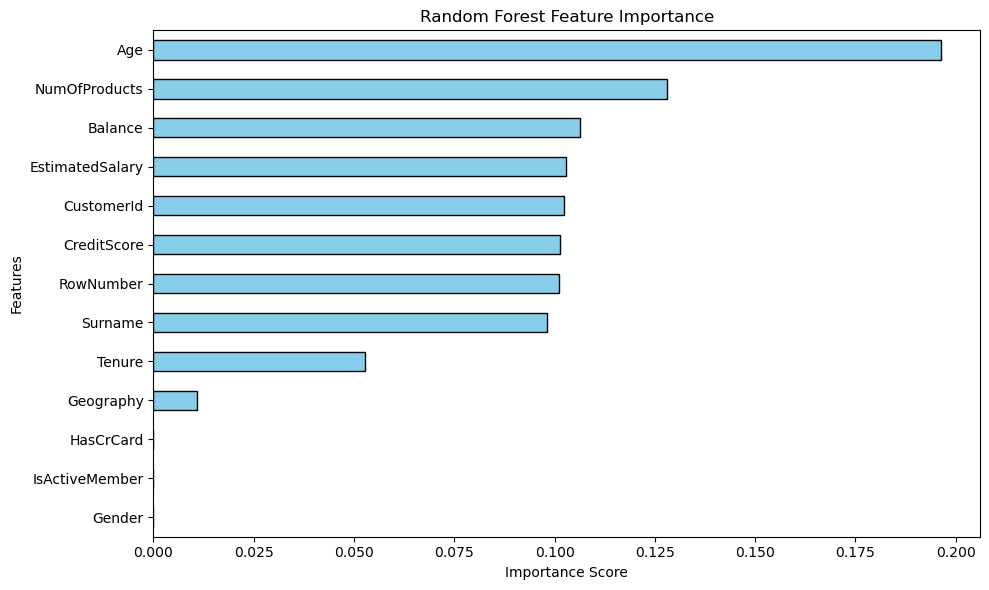

Top Features by Random Forest:
Age                0.196232
NumOfProducts      0.128005
Balance            0.106289
EstimatedSalary    0.102832
CustomerId         0.102435
CreditScore        0.101393
RowNumber          0.101147
Surname            0.098076
Tenure             0.052780
Geography          0.010812
Gender             0.000000
HasCrCard          0.000000
IsActiveMember     0.000000
dtype: float64


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Detect the promotion column
churn_col = [col for col in df.columns if "churn" in col.lower()][0]

# Prepare features (X) and label (y)
X = df.drop(churn_col, axis=1)
y = df[churn_col]

# Encode categorical columns
cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Train Random Forest 
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

# Feature Importance
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
features.sort_values().plot(
    kind='barh',
    title="Random Forest Feature Importance",
    color='skyblue',
    edgecolor='black'
)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Print Ranked Features
print("Top Features by Random Forest:")
print(features.sort_values(ascending=False))

In [65]:
import pandas as pd
df = pd.read_csv("churn_modelling.csv")

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

churn_col = [col for col in df.columns if "churn" in col.lower()][0]
print("Target column detected:", churn_col)

X = df.drop(columns=[churn_col])
y = df[churn_col]

cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Target column detected: Churn
Shapes:
X_train: (8000, 13)
X_test: (2000, 13)
y_train: (8000,)
y_test: (2000,)


In [69]:
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (8000, 13)
Testing Set Shape: (2000, 13)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(X_test) 

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.58      0.14      0.23       407

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000



In [76]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("promotion_dataset.csv")

# Standardize column names
df.columns = df.columns.str.strip()

# 3. Detect the target column automatically
target_col = [col for col in df.columns if "promot" in col.lower()][0]

# 4. Separate X and y
X = df.drop(columns=[target_col])
y = df[target_col]

# 5. Encode categorical columns
cat_cols = X.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Build XGBoost model
model = XGBClassifier(
    n_estimators=800,
    max_depth=6,
    learning_rate=0.05,
    objective="binary:logistic",
    eval_metric="logloss"
)
# 8. Train model
model.fit(X_train, y_train)
# 9. Predict
y_pred = model.predict(X_test)
# 10. Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9417982513375962

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7015
           1       0.90      0.35      0.51       648

    accuracy                           0.94      7663
   macro avg       0.92      0.67      0.74      7663
weighted avg       0.94      0.94      0.93      7663



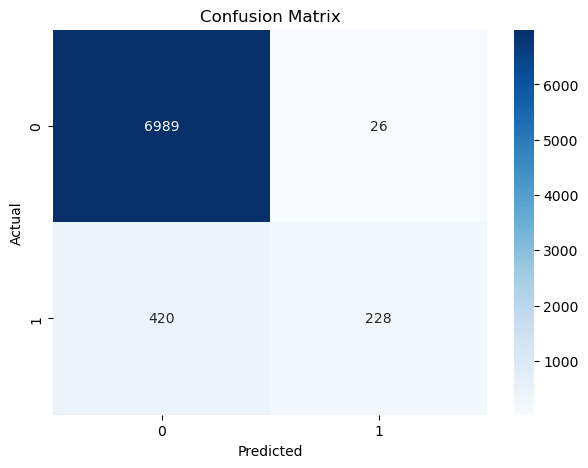

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Get actual class labels
labels = sorted(y_test.unique())

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv("churn_modelling.csv")
df.columns = df.columns.str.strip()

# Detect target column automatically
target_col = [col for col in df.columns if "churn" in col.lower()][0]

# Split features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categoricals
cat_cols = X.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Scale data
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest + GridSearch
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

# Retrieve the BEST model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_rf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [83]:
import numpy as np
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
class_labels = [0, 1,]

for i, label in enumerate(class_labels):
    TP = conf_mat[i, i]
    FP = conf_mat[:, i].sum() - TP 
    FN = conf_mat[i, :].sum() - TP
    TN = conf_mat.sum() - (TP + FP + FN)
    
    print(f"\nClass {label}:")
    print(f"  TP (True Positive): {TP}")
    print(f"  FP (False Positive): {FP}")
    print(f"  FN (False Negative): {FN}")
    print(f"  TN (True Negative): {TN}")


Class 0:
  TP (True Positive): 1546
  FP (False Positive): 233
  FN (False Negative): 47
  TN (True Negative): 174

Class 1:
  TP (True Positive): 174
  FP (False Positive): 47
  FN (False Negative): 233
  TN (True Negative): 1546


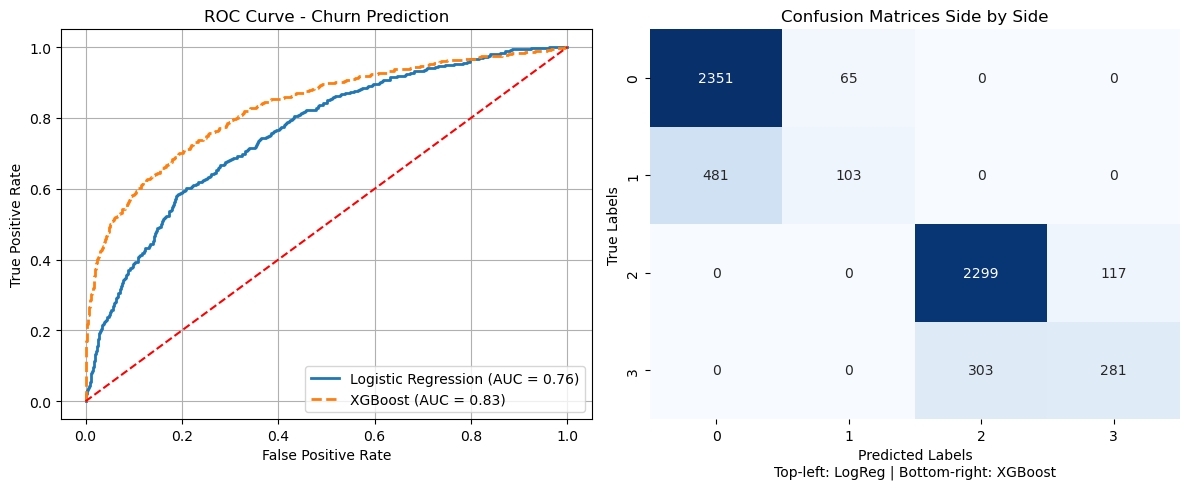

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
from xgboost import XGBClassifier

# ------------------------------
# 1. Load churn dataset
# ------------------------------
df = pd.read_csv("churn_modelling.csv")  # replace with your file

# Clean column names
df.columns = df.columns.str.strip()

# Target column
target = "Churn"  # change if different
y = df[target]

# ------------------------------
# 2. Encode categorical columns
# ------------------------------
X = df.drop(columns=[target])
cat_cols = X.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in cat_cols:
    X[col] = X[col].astype(str).fillna("Unknown")
    X[col] = le.fit_transform(X[col])

# ------------------------------
# 3. Scale numeric features
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 4. Train-test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# ------------------------------
# 5. Logistic Regression
# ------------------------------
log_model = LogisticRegression(solver='liblinear', max_iter=5000)  # binary -> no multi_class needed
log_model.fit(X_train, y_train)
log_proba = log_model.predict_proba(X_test)[:, 1]
log_pred = log_model.predict(X_test)

# ------------------------------
# 6. XGBoost
# ------------------------------
xgb_model = XGBClassifier(eval_metric='logloss')  # remove use_label_encoder
xgb_model.fit(X_train, y_train)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_pred = xgb_model.predict(X_test)

# ------------------------------
# 7. Compute ROC and AUC
# ------------------------------
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
auc_log = auc(fpr_log, tpr_log)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# ------------------------------
# 8. Plot ROC curves
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr_log, tpr_log, lw=2, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_xgb, tpr_xgb, lw=2, linestyle='--', label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Churn Prediction')
plt.legend(loc='lower right')
plt.grid(True)

# ------------------------------
# 9. Confusion Matrices
# ------------------------------
plt.subplot(1,2,2)
cm_log = confusion_matrix(y_test, log_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)

# Stack confusion matrices vertically
cm_combined = np.block([
    [cm_log, np.zeros_like(cm_log)],
    [np.zeros_like(cm_xgb), cm_xgb]
])

sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels\nTop-left: LogReg | Bottom-right: XGBoost')
plt.ylabel('True Labels')
plt.title('Confusion Matrices Side by Side')

plt.tight_layout()
plt.show()